In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import struct

dir = '../Trace/' # WSL 22.04.
#dir = '../../mnt/c/Users/louxsoen/Documents/P/Nerual-Network-SCA/Float-Point-NN-Mantissa/Trace/'

In [43]:
corrp = np.load(dir + "corrp.npy")
corrm = np.load(dir + "corrm.npy")
ref = 4
stp = 260

maxval = np.zeros([255, ref])
timing = np.zeros([255, ref-1])
area = np.zeros(stp)

for trace in range(0, 255):
    mdex = np.argmax(corrp[trace])
    for block in range(0, ref):
        sdex = mdex + (stp * block)
        area = corrp[trace][sdex:sdex+stp]
        maxval[trace][block] = np.argmax(area)

for t in range(0, 255):
    for i in range(0, ref):
        maxval[t][i] += stp * i
for t in range(0, 255):
    for i in range(0, ref-1):
        timing[t][i] = (maxval[t][i+1] - maxval[t][i]) / 4

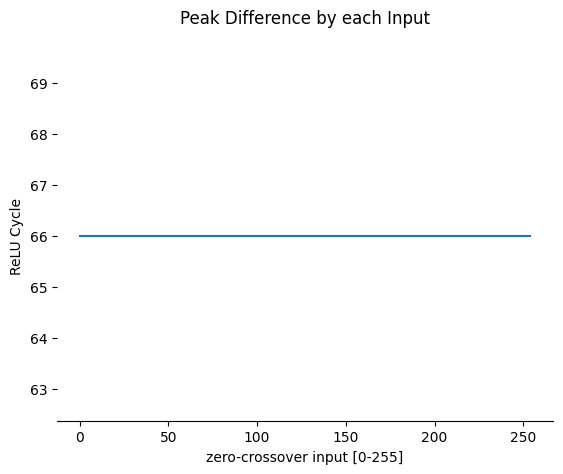

In [44]:
fig, ax = plt.subplots()
timing = np.transpose(timing)
ax.set_title('Peak Difference by each Input', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('zero-crossover input [0-255]')
ax.set_ylabel('ReLU Cycle')
plt.plot(timing[0], '-')
plt.show()

In [45]:
np.save(dir + "diff", timing)